##### Plot of the mutation rate and the mutagen resistance

In [8]:
options(warn=-1)
library(reshape2)
library(ggplot2)
require(GGally)

In [9]:
load(url('https://github.com/gouliangke/Mutation-rate/raw/master/Rdata_mutagen_sensitivity/mutagen.heri.Rdata'))
load(url('https://github.com/gouliangke/Mutation-rate/raw/master/Rdata_mutagen_sensitivity/seg.heri.Rdata'))
load(url('https://github.com/gouliangke/Mutation-rate/raw/master/Rdata_mutagen_sensitivity/1000BYxRM_with_names.RData'))

In [2]:
#find the overlap strains in both mutation rate assay and mutagen sensitivity assay
names=intersect(mutagen.heri$strain,seg.heri$strain)

#mutagen data 
mutagen.heri.intersect = mutagen.heri[which(mutagen.heri$strain %in% names),]

#our original data represents the mutagen resistance; here we convert it to the sensitivity score by taking the negative
mutagen.sensitivity = mutagen.heri.intersect[1:nrow(mutagen.heri.intersect),1:(ncol(mutagen.heri.intersect)-1)]*(-1)
mutagen.sensitivity$strain = mutagen.heri.intersect$strain

#the mutation rate data
seg.heri.intersect=seg.heri[which(seg.heri$strain %in% names),]

#merge the mutation rate data with the mutagen sensitivity data
muta.mr=merge(mutagen.sensitivity,seg.heri.intersect)
colnames(muta.mr)=c("strain","4NQO","4NQO_conc2","Caffeine_conc1","Caffeine_conc2",
                    "H2O2","H2O2_conc2","MMS","MMS_conc2","Mutation Rate","batch")

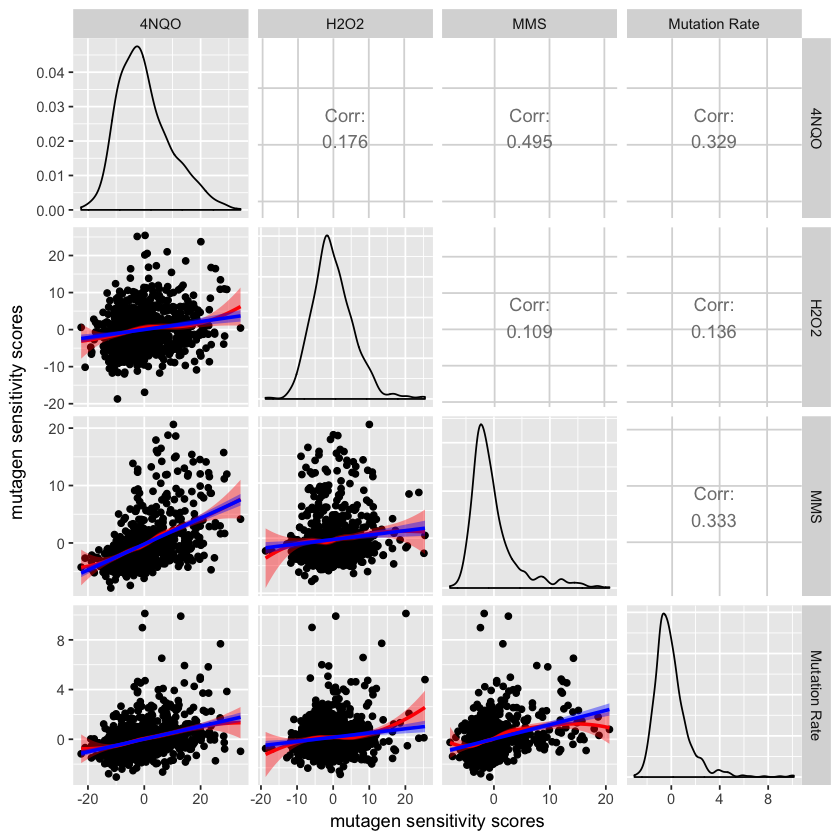

In [4]:
my_fn <- function(data, mapping, ...){
  p <- ggplot(data = data, mapping = mapping) + 
    geom_point() + 
    geom_smooth(method=loess, fill="red", color="red", ...) +
    geom_smooth(method=lm, fill="blue", color="blue", ...)
  p
}

ggpairs(data=muta.mr,
        columns = c(2,6,8,10),
        lower = list(continuous = my_fn),
        xlab = "mutagen sensitivity scores",  
        ylab = "mutagen sensitivity scores")

From the above plot, we find a negative correlation between the mutation rate and the mutagen sensitivity. 